In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_train = pd.read_csv("Data_Train.csv")

In [4]:
data_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data_train.shape

(10683, 11)

In [8]:
data_train[data_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
data_train.dropna(inplace = True)

In [10]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Performing Data Preprocessing and extracting derived features

In [11]:
data1 = data_train.copy()

In [12]:
data1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
data1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
def change_into_time_date(col):
    data1[col] = pd.to_datetime(data1[col])

In [15]:
data1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_time_date(feature)

In [17]:
data1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data1['Date_of_Journey'].min() #OLDEST DATE

Timestamp('2019-01-03 00:00:00')

In [19]:
data1['Date_of_Journey'].max() #NEWEST DATE

Timestamp('2019-12-06 00:00:00')

In [20]:
data1['Journey_Day'] = data1['Date_of_Journey'].dt.day

In [21]:
data1['Journey_Month'] = data1['Date_of_Journey'].dt.month

In [22]:
data1['Journey_Year']=data1['Date_of_Journey'].dt.year

In [23]:
data1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-01-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-27 05:50:00,2023-01-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [24]:
data1.drop('Date_of_Journey' , axis = 1 , inplace = True )

In [25]:
data1.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-01-27 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-27 05:50:00,2023-01-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


### Cleaning Departure time and arrival time as well as featuring the same

In [26]:
def extract_hour_and_minute(df,col):
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute
    df.drop(col , axis = 1 , inplace=True)
    return df.head(2)

In [27]:
extract_hour_and_minute(data1,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-27 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [28]:
extract_hour_and_minute(data1,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


## <u> Data Analysis</u>
### Analysing when will most of the flights will take off

In [29]:
def flight_departure_time(x):
    if( x > 4 and x<= 8):
        return "Early Morning"
    elif(  x > 8 and x<= 12 ):
        return "Morning"
    elif(  x > 12 and x<= 16 ):
        return "Noon"
    elif(  x > 16 and x<= 20 ):
        return "Evening"
    elif(  x > 20 and x<= 24 ):
        return "Night"
    else:
        return "Late Night"

In [30]:
data1['Dep_Time_hour'].apply(flight_departure_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

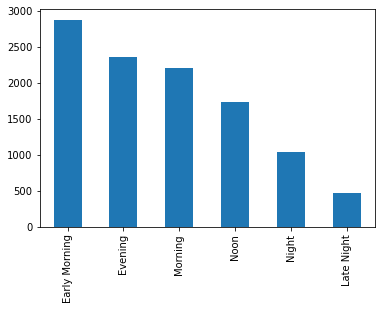

In [31]:
data1['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind = 'bar')

In [32]:
#!pip install cufflinks

In [33]:
import plotly 
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [34]:
cf.go_offline()

In [35]:
data1['Dep_Time_hour'].apply(flight_departure_time).value_counts().iplot(kind = 'bar')

### Pre-Processing Duration Feature and extract meaningful features from it

In [36]:
data1.tail(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0
10669,Air India,Delhi,Cochin,DEL → BOM → COK,11h 15m,1 stop,No info,9929,15,6,2019,8,0,19,15
10670,Air India,Kolkata,Banglore,CCU → IXR → DEL → BLR,17h 25m,2 stops,No info,11411,5,12,2019,5,50,23,15
10671,Air India,Mumbai,Hyderabad,BOM → HYD,1h 20m,non-stop,No info,3100,6,6,2019,21,5,22,25
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h,2 stops,No info,16704,27,5,2019,13,25,4,25
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20
10675,Air India,Mumbai,Hyderabad,BOM → HYD,1h 20m,non-stop,No info,3100,6,9,2019,6,20,7,40
10676,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,8h 40m,1 stop,No info,9794,5,1,2019,10,20,19,0
10677,SpiceJet,Banglore,Delhi,BLR → DEL,2h 40m,non-stop,No check-in baggage included,3257,21,5,2019,5,55,8,35


In [37]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x+' 0m'
    return x

In [38]:
data1['Duration'] = data1['Duration'].apply(preprocess_duration)

In [39]:
data1['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
int(data1['Duration'][0].split(' ')[0][0:-1])

2

In [41]:
int(data1['Duration'][0].split(' ')[1][0:-1])

50

In [42]:
data1['Duration_Hours'] = data1['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [43]:
data1['Duration_Minutes'] = data1['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [44]:
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


### Analysing whether the duration impacts on price

In [45]:
data1['Total_Duration_in_Minutes'] = data1['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [46]:
data1.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Total_Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


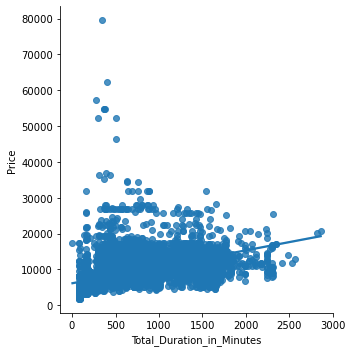

In [47]:
sns.lmplot(x = 'Total_Duration_in_Minutes' , y = 'Price' , data = data1)

#### It is clear by the above plot that as the duration increases the price also increases. Though there are some exceptions

### Finding which city has maximum final destinations of flights

In [48]:
data1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [49]:
data1['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

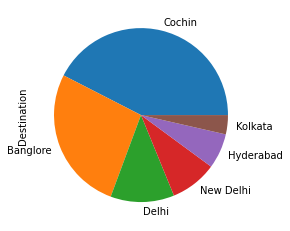

In [50]:
data1['Destination'].value_counts().plot(kind = 'pie')

###  <u> Bi-Variate Analysis </u>
#### Extremely used route by the  JET AIRWAYS 

In [51]:
data1['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [52]:
data1[data1['Airline'] == 'Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Total_Duration_in_Minutes
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,1485


In [53]:
data1[data1['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending= False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### Airline V/s Price distribution 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

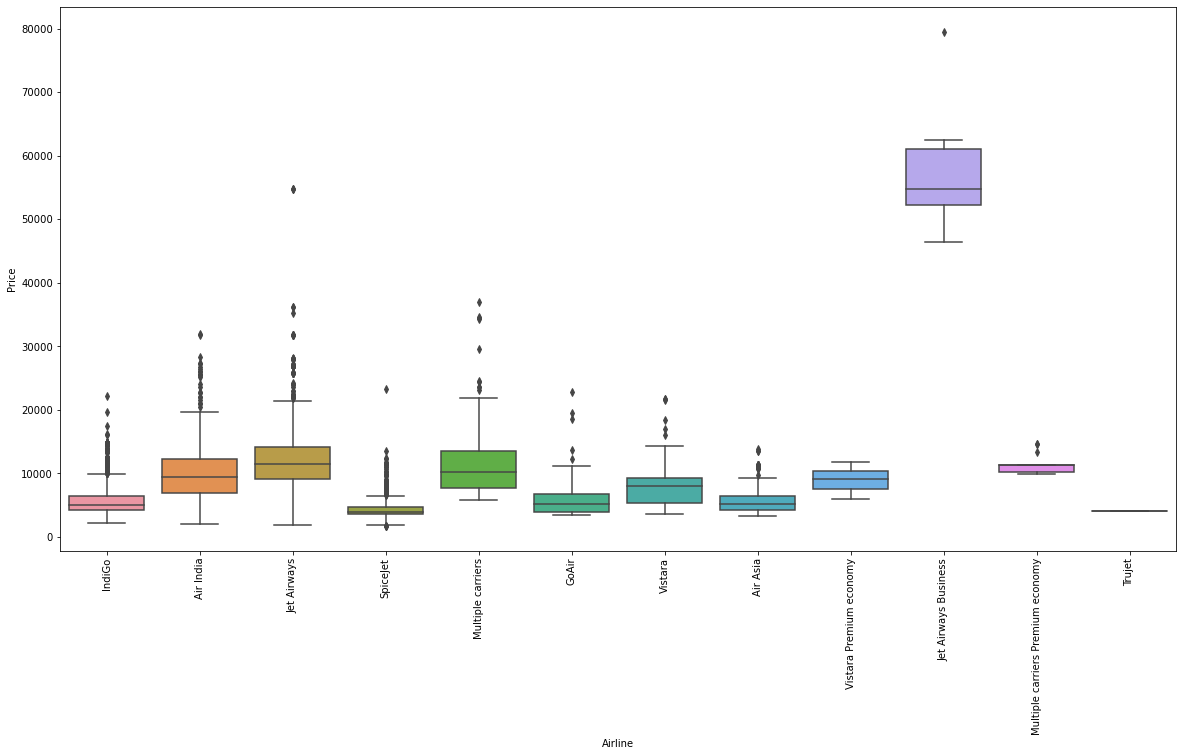

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Airline',y='Price',data = data1)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

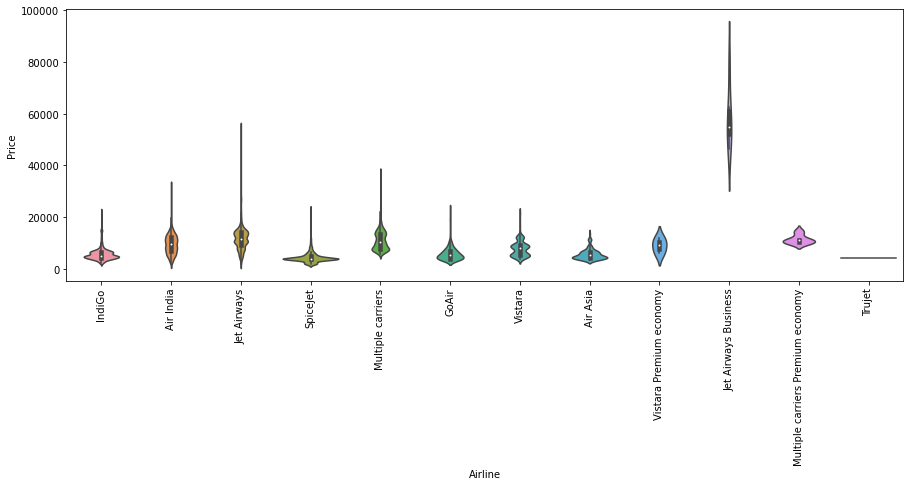

In [55]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Airline',y='Price',data = data1)
plt.xticks(rotation = 'vertical')

### Feature Encoding (Applying one hot)

In [56]:
data1.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Total_Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [57]:
np.round(data1['Additional_Info'].value_counts()/len(data1) *100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [58]:
data1.drop(columns = ['Additional_Info','Route','Total_Duration_in_Minutes','Journey_Year'],axis = 1,inplace = True)

In [59]:
data1.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [60]:
data1.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45


In [61]:
cat_col = [col for col in data1.columns if data1[col].dtype == 'object']

In [62]:
num_col = [col for col in data1.columns if data1[col].dtype != 'object']

In [63]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [64]:
num_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_Hours',
 'Duration_Minutes']

In [65]:
data1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [66]:
data1['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

### <u> ONE - HOT ENCODING</u>

In [67]:
for category in data1['Source'].unique():
    data1['Source_' + category] = data1['Source'].apply(lambda x: 1 if x == category else 0)

In [68]:
data1

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,4,9,19,55,22,25,2,30,0,1,0,0,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,7229,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,3,1,11,30,14,10,2,40,1,0,0,0,0


### Performing target guided encoding

In [69]:
data1.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [70]:
airline = data1.groupby(['Airline'])['Price'].mean().sort_values().index

In [71]:
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
dict1 = {key:index for index,key in enumerate(airline,0)}

In [73]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [74]:
data1['Airline'] = data1['Airline'].map(dict1)

In [75]:
data1['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
data1.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [77]:
data1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [78]:
data1['Destination'].replace('New Delhi','Delhi',inplace = True)

In [79]:
data1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [80]:
dest = data1.groupby(['Destination'])['Price'].mean().sort_values().index

In [81]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [82]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [83]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
data1['Destination'] = data1['Destination'].map(dict2)

In [85]:
data1['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [86]:
data1.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [87]:
data1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [88]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [89]:
data1['Total_Stops'] = data1['Total_Stops'].map(stops)

In [90]:
data1['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### Detecting Outliers

In [91]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3, kde= False)

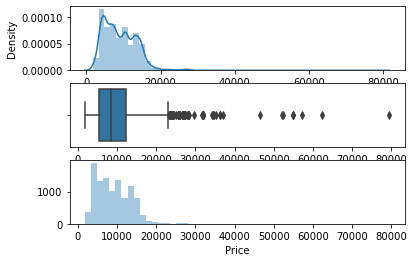

In [92]:
plot(data1,'Price')

### Dealing with outliers

In [93]:
data1['Price'] = np.where(data1['Price'] >= 35000,data1['Price'].median(),data1['Price'])

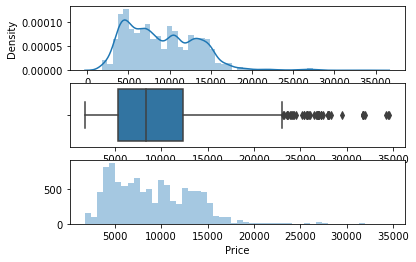

In [94]:
plot(data1,'Price')

### <u> Feature Selection </u>

In [95]:
data1.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [96]:
data1.drop(columns = ['Source','Duration'],axis = 1, inplace = True)

In [97]:
data1.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [98]:
data1.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
Journey_Day              int64
Journey_Month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_Hours           int64
Duration_Minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

### Feature Selection

In [99]:
from sklearn.feature_selection import mutual_info_regression

In [100]:
X = data1.drop(['Price'], axis =1)

In [101]:
y = data1['Price']

In [102]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Journey_Day            int64
Journey_Month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_Hours         int64
Duration_Minutes       int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [103]:
mutual_info_regression(X,y)

array([0.97270193, 0.99902905, 0.78953164, 0.19064778, 0.23954887,
       0.34299342, 0.25498695, 0.40711308, 0.35230045, 0.46146338,
       0.34752077, 0.39150461, 0.46775674, 0.5215629 , 0.12457155,
       0.2032726 ])

In [104]:
imp = pd.DataFrame(mutual_info_regression(X,y),index = X.columns)

In [105]:
imp

,0
Airline,0.977015
Destination,0.996397
Total_Stops,0.780933
Journey_Day,0.203005
Journey_Month,0.240555
Dep_Time_hour,0.341233
Dep_Time_minute,0.258002
Arrival_Time_hour,0.401683
Arrival_Time_minute,0.344595
Duration_Hours,0.463760


In [106]:
imp.columns = ['Importance']

In [107]:
imp.sort_values(by = 'Importance' , ascending=False)

,Importance
Destination,0.996397
Airline,0.977015
Total_Stops,0.780933
Source_Delhi,0.527404
Duration_Hours,0.463760
Source_Kolkata,0.457243
Arrival_Time_hour,0.401683
Source_Banglore,0.385968
Duration_Minutes,0.348196
Arrival_Time_minute,0.344595


# Machine Learning Model

## Random Forest

### Splitting Data

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
ml_model = RandomForestRegressor()

In [112]:
model = ml_model.fit(X_train,y_train)

In [113]:
y_pred = model.predict(X_test)

In [114]:
y_pred

array([16609.96,  6459.51,  8740.9 , ...,  3527.79,  6136.71,  7053.61])

In [115]:
y_pred.shape

(2671,)

In [116]:
len(y_pred)

2671

### Saving Model

In [117]:
import pickle

In [118]:
file = open('rf_model.pkl','wb')

In [119]:
pickle.dump(model,file)

In [120]:
model = open('rf_model.pkl','rb')

In [121]:
forest = pickle.load(model)

In [122]:
forest.predict(X_test)

array([16609.96,  6459.51,  8740.9 , ...,  3527.79,  6136.71,  7053.61])

In [123]:
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [124]:
mape(y_test,forest.predict(X_test))

13.256068822244421

In [125]:
def predict(ml_model):
    
    model = ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are:{}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2_score:{}'.format(r2_score))
    print('MSE :',metrics.mean_squared_error(y_test,y_prediction))
    print('MAE :',metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE :', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    plt.show()
    




Training Score: 0.9512324258935178
Predictions are:[16718.76  6337.65  8893.58 ...  3539.8   6294.09  7036.8 ]


r2_score:0.8077196162741083
MSE : 3743237.53389095
MAE : 1182.3728120524386
RMSE : 1934.744823973164
MAPE : 13.265560505580948


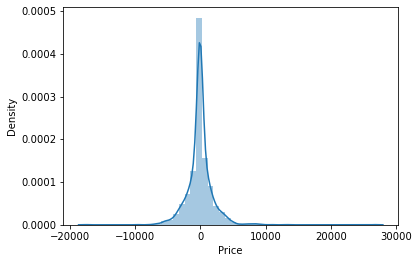

In [126]:
predict(RandomForestRegressor())